# Applying momentum to gradient descent

- Gradient Descent ethod experiences zig-zag behavior or oscillations in certain situatuions. 
    1)  High learning rate
    2)  Mini-batches: Because mini-batch gradient descent makes a parameter update after seeing just a subset of examples, the direction of the update has some variance, and so the path taken by mini-batch gradient descent will "oscillate" toward convergence. <br> 
<br>

- These oscillations can slow learning down and in some cases where learning rate is very high GD may diverge completely 

- We can solve this by using momentum that uses exponentially weighted averages as an underlying algorithm.
    1) Momentum takes into account the **past gradients** to smooth out the update. The 'direction' of the previous gradients is stored in the variable 𝑣.
    2)  $\beta$ is the weight of the previous data values and $1-\beta$ is the weight of the most recent values. 

In [1]:
from autograd import grad 
from autograd import numpy as np
from autograd import value_and_grad 
import matplotlib.pyplot as plt
import seaborn as sns
import utils
import pandas as pd

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib import cm
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.axisbelow'] = True 

#### Dataset
- Ford Dataset from - Machine Learning Refined, 2nd Edition, Jeremy Watt, Reza Borhani, Aggelos K. Katsaggelos.

In [2]:
df = pd.read_csv('ford_data.csv')
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1975-03-01,1.070527,1.248949,1.062417,1.204343,0.002020,48741400
1,1975-04-01,1.204343,1.244894,1.119188,1.167848,0.001958,29854600


### Example of Exponential Weighted Average
- Trying different values of $\beta$ to see exponentially weighted average.

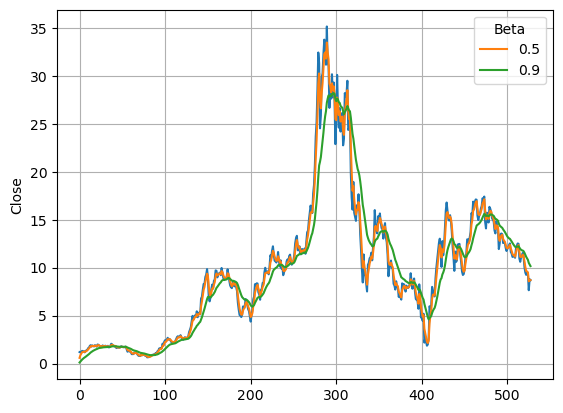

In [3]:
sns.lineplot(df['Close'])
x = np.array(df['Close'])

beta_arr = [0.5,0.9]
for beta in beta_arr:
    x_new = 0
    x_eav = [] 
    for idx in range(len(x)):
        x_new = x_new*beta + (1-beta)*x[idx]
        x_eav.append(x_new)

    sns.lineplot(x_eav, label=beta)
plt.legend(title='Beta')

### Apply exponential weighted average to Gradient Descent 
- Convex function we are trying to minimize: g = lambda w: (a1 + np.dot(b1.T,w) + np.dot(np.dot(w.T,C1),w))[0]
- We see the how # of iterations to reach the minimum reduce after using gradient descent

In [4]:
a1 = 0
b1 = np.sin(10)*np.ones((2,1))
C1 = np.array([[0.5,1],[0,9.75]])
g = lambda w: (a1 + np.dot(b1.T,w) + np.dot(np.dot(w.T,C1),w))[0]

w = np.array([10.0,1.0]) # 2D initialization point
weight_1 = np.linspace(-1,10,100)
weight_2 = np.linspace(-1,1,100)


Plot-1: GD with # of iterations = 50


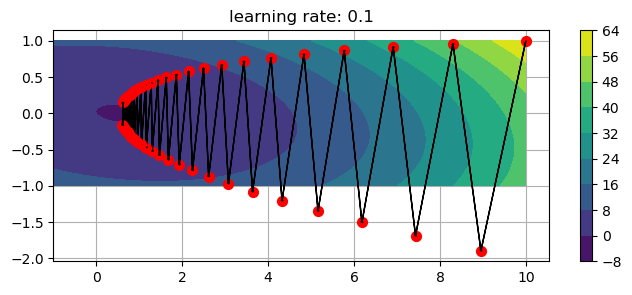

In [8]:
alpha = [0.1]
max_its = 50
i = 1

for alpha_choice in alpha:
    weight_history,cost_history = utils.gradient_descent(g,alpha_choice,max_its,w)
    w1_vals, w2_vals, func_vals = utils.gen_plot_varaiables(weight_1,weight_2, g)
    print(f'Plot-{i}: GD with # of iterations = {max_its}')
    utils.plot_contour_plots(w1_vals, w2_vals, weight_history, func_vals, alpha_choice)
    i = i+1

Plot-2: GD with # of iterations = 25


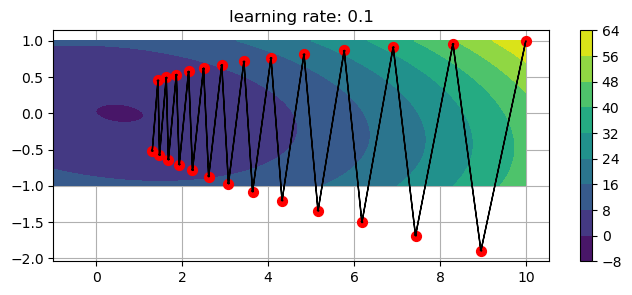

In [9]:

max_its = 25

for alpha_choice in alpha:
    weight_history,cost_history = utils.gradient_descent(g,alpha_choice,max_its,w)
    w1_vals, w2_vals, func_vals = utils.gen_plot_varaiables(weight_1,weight_2, g)
    print(f'Plot-{i}: GD with # of iterations = {max_its}')
    utils.plot_contour_plots(w1_vals, w2_vals, weight_history, func_vals, alpha_choice)
    i = i+1

Plot-3: GD with # of iterations = 25


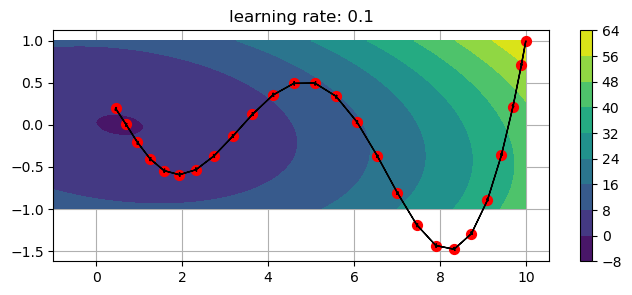

In [10]:
max_its = 25
beta= 0.9

for alpha_choice in alpha:
    weight_history,cost_history = utils.momentum(g,alpha_choice,max_its,w,beta)
    w1_vals, w2_vals, func_vals = utils.gen_plot_varaiables(weight_1,weight_2, g)
    print(f'Plot-{i}: GD with # of iterations = {max_its}')
    utils.plot_contour_plots(w1_vals, w2_vals, weight_history, func_vals, alpha_choice)

## Observations
- After using momentum GD reaches mininimum faster (with lower number of iterations) at the same learning rate. 
- Plot 1 we reach minimum when # of iterations are 50 and in Plot -3 when momentum is used we reach minimum with 25 iterations

## References
- Machine Learning Refined, 2nd Edition, Jeremy Watt, Reza Borhani, Aggelos K. Katsaggelos.